In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('AusOpen-men-2013.csv')
print(df.columns)
df.shape

Index(['Player1', 'Player2', 'Round', 'Result', 'FNL1', 'FNL2', 'FSP.1',
       'FSW.1', 'SSP.1', 'SSW.1', 'ACE.1', 'DBF.1', 'WNR.1', 'UFE.1', 'BPC.1',
       'BPW.1', 'NPA.1', 'NPW.1', 'TPW.1', 'ST1.1', 'ST2.1', 'ST3.1', 'ST4.1',
       'ST5.1', 'FSP.2', 'FSW.2', 'SSP.2', 'SSW.2', 'ACE.2', 'DBF.2', 'WNR.2',
       'UFE.2', 'BPC.2', 'BPW.2', 'NPA.2', 'NPW.2', 'TPW.2', 'ST1.2', 'ST2.2',
       'ST3.2', 'ST4.2', 'ST5.2'],
      dtype='object')


(126, 42)

In [ ]:
df.head()

,Player1,Player2,Round,Result,FNL1,FNL2,FSP.1,FSW.1,SSP.1,SSW.1,...,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
0,Lukas Lacko,Novak Djokovic,1,0,0,3,61,35,39,18,...,4,8,8.0,9.0,101,6,7.0,6.0,NaN,NaN
1,Leonardo Mayer,Albert Montanes,1,1,3,0,61,31,39,13,...,0,0,NaN,NaN,42,1,3.0,1.0,NaN,NaN
2,Marcos Baghdatis,Denis Istomin,1,0,0,3,52,53,48,20,...,4,13,12.0,16.0,126,6,7.0,6.0,NaN,NaN
3,Dmitry Tursunov,Michael Russell,1,1,3,0,53,39,47,24,...,1,7,NaN,NaN,79,2,2.0,3.0,NaN,NaN
4,Juan Monaco,Ernests Gulbis,1,0,1,3,76,63,24,12,...,3,5,16.0,28.0,127,1,6.0,7.0,6.0,NaN


In [ ]:
df=pd.read_csv('AusOpen-women-2013.csv')
set1=(df['ST1.1']-df['ST1.2']).tolist()
set2=(df['ST2.1']-df['ST2.2']).tolist()
set3=(df['ST3.1']-df['ST3.2']).tolist()
result=df['Result'].tolist()
losefirsttwo=0
flag=0; ind=[]
for i in range(len(df)):
  if set1[i]<0 and set2[i]<0:
    losefirsttwo+=1
for i in range(len(df)):
  if set1[i]<0 and set2[i]<0 and result[i]==1:
    flag+=1
    ind.append(i)
print(flag,losefirsttwo)
print(flag/losefirsttwo)

0 41
0.0


No. of matches in which match ended in only 3 rounds is 74 out of 125 face-offs
No. of matches in which match ended in only 4 rounds is 29 out of 125 face-offs
No. of matches in which match went for 5 rounds is 22 out of 125 face-offs


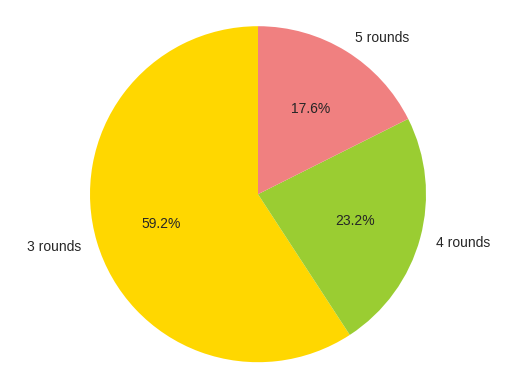

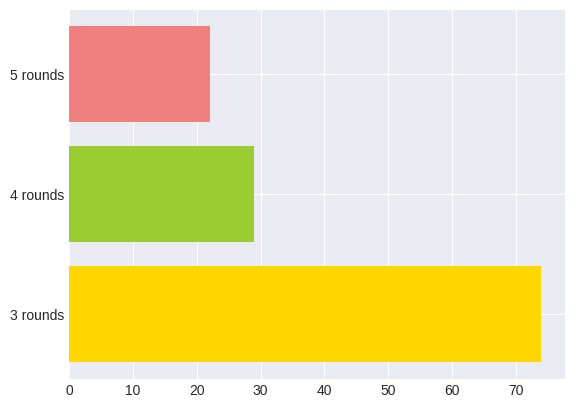

In [ ]:
df=pd.read_csv('FrenchOpen-men-2013.csv')
df['ST4.1']=df['ST4.1'].fillna('no')
s4=df['ST4.1'].tolist()
#print(s4)
indl=[]
for i in range(len(s4)):
  if type(s4[i])==str:
    indl.append(i)
#print(indl)
print("No. of matches in which match ended in only 3 rounds is",len(indl),'out of',len(s4),'face-offs')
types_match_end3=[]
count_4=0
df['ST5.1']=df['ST5.1'].fillna('no')
s5=df['ST5.1'].tolist()
for i in range(len(s5)):
  if type(s4[i])==float and type(s5[i])==str:
    count_4+=1
print("No. of matches in which match ended in only 4 rounds is",count_4,'out of',len(s5),'face-offs')
print("No. of matches in which match went for 5 rounds is",len(df)-len(indl)-count_4,'out of',len(s5),'face-offs')

labels = ['3 rounds', '4 rounds', '5 rounds']
sizes = [74, 29, 22]
colors = ['gold', 'yellowgreen', 'lightcoral']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
fig2, ax2 = plt.subplots()
ax2.barh(labels, sizes, color=colors)
plt.subplots_adjust(wspace=0.5)
plt.show()


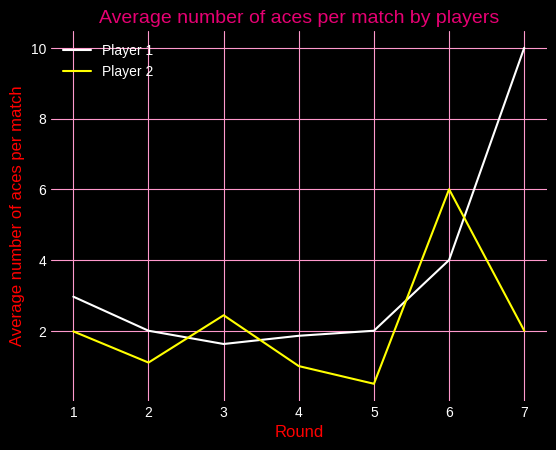

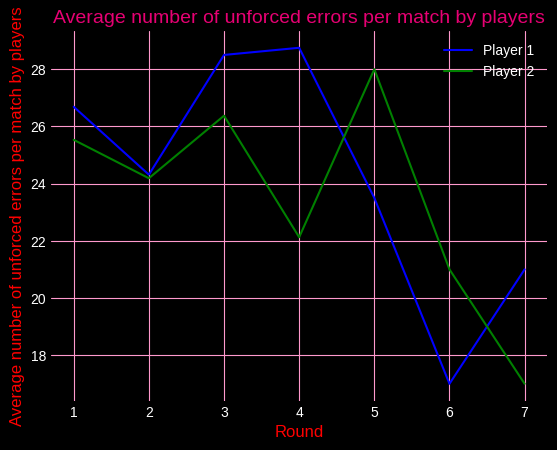

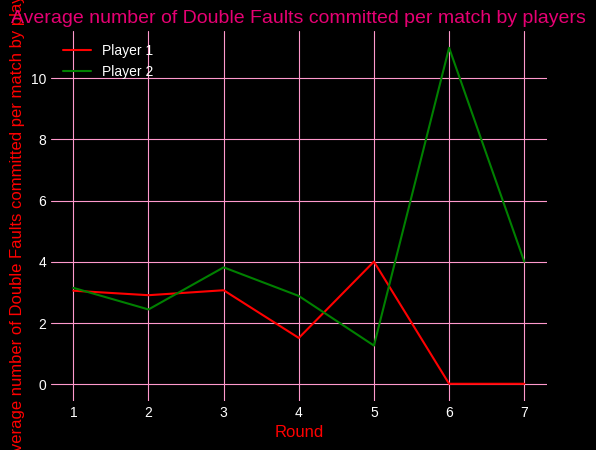

In [ ]:
df=pd.read_csv('FrenchOpen-women-2013.csv')
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
purple_color = '#e60073'
red_color = 'red'
pink_color = '#ff99cc'
data=df

# Plot 1: Average number of aces per match by players
aces_by_round = data.groupby("Round").agg({"ACE.1": "mean", "ACE.2": "mean"}).reset_index()
plt.plot(aces_by_round["Round"], aces_by_round["ACE.1"], label="Player 1", color='white')
plt.plot(aces_by_round["Round"], aces_by_round["ACE.2"], label="Player 2", color='yellow')
plt.xlabel("Round", fontsize=12, color=red_color)
plt.ylabel("Average number of aces per match", fontsize=12, color=red_color)
plt.title("Average number of aces per match by players", fontsize=14, color=purple_color)
plt.legend()
plt.grid(color=pink_color)
plt.show()

# Plot 2: Average number of unforced errors per match by players
unferr_by_round = data.groupby("Round").agg({"UFE.1": "mean", "UFE.2": "mean"}).reset_index()
plt.plot(unferr_by_round["Round"], unferr_by_round["UFE.1"], label="Player 1", color='blue')
plt.plot(unferr_by_round["Round"], unferr_by_round["UFE.2"], label="Player 2", color='green')
plt.xlabel("Round", fontsize=12, color=red_color)
plt.ylabel("Average number of unforced errors per match by players", fontsize=12, color=red_color)
plt.title("Average number of unforced errors per match by players", fontsize=14, color=purple_color)
plt.legend()
plt.grid(color=pink_color)
plt.show()

# Plot 3: Average number of double faults committed per match by players
doublefaults_by_round = data.groupby("Round").agg({"DBF.1": "mean", "DBF.2": "mean"}).reset_index()
plt.plot(doublefaults_by_round["Round"], doublefaults_by_round["DBF.1"], label="Player 1", color='red')
plt.plot(doublefaults_by_round["Round"], doublefaults_by_round["DBF.2"], label="Player 2", color='green')
plt.xlabel("Round", fontsize=12, color=red_color)
plt.ylabel("Average number of Double Faults committed per match by players", fontsize=12, color=red_color)
plt.title("Average number of Double Faults committed per match by players", fontsize=14, color=purple_color)
plt.legend()
plt.grid(color=pink_color)
plt.show()


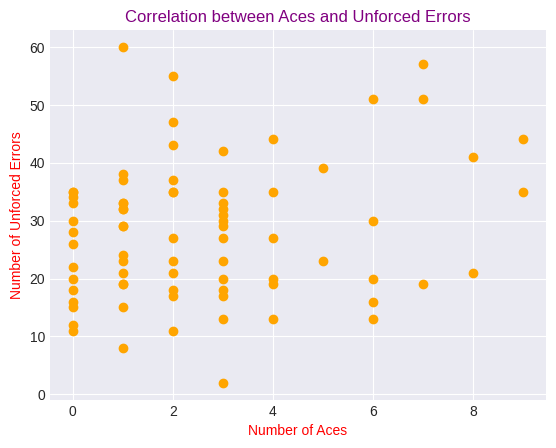

In [ ]:
tennis_data=pd.read_csv('USOpen-women-2013.csv')
x = tennis_data['ACE.1']
y = tennis_data['UFE.1']
plt.scatter(x, y,color='orange')
plt.title('Correlation between Aces and Unforced Errors',color='purple')
plt.xlabel('Number of Aces',color='red')
plt.ylabel('Number of Unforced Errors',color='red')
plt.show()


The average number of net points attempted per match by a player is: 19.0625
The average number of aces per match by a player is: 8.884920634920636
The average number of unforced error per match by a player is: nan
The average number of double faults per match by a player is: 4.773809523809524


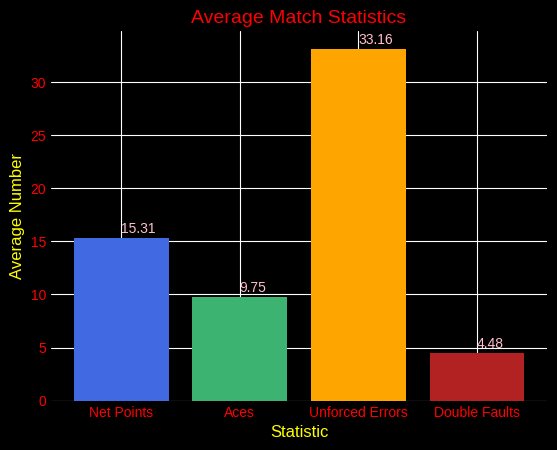

In [ ]:
df=pd.read_csv('USOpen-men-2013.csv')
df['Net Points Attempted P1'] = df['NPA.1']
df['Net Points Attempted P2'] = df['NPA.2']
avg_npa_p1 = df['Net Points Attempted P1'].mean()
avg_npa_p2 = df['Net Points Attempted P2'].mean()
print('The average number of net points attempted per match by a player is:', (avg_npa_p1+avg_npa_p2)/2)
print('The average number of aces per match by a player is:', (df['ACE.1'].mean()+df['ACE.2'].mean())/2)
print('The average number of unforced error per match by a player is:', (df['UFE.1'].mean()+df['UFE.2'].mean())/2)
print('The average number of double faults per match by a player is:', (df['DBF.1'].mean()+df['DBF.2'].mean())/2)

net_points = 15.3125
aces = 9.753968253968253
unforced_errors = 33.16269841269842
double_faults = 4.476
data = np.array([net_points, aces, unforced_errors, double_faults])
labels = ['Net Points', 'Aces', 'Unforced Errors', 'Double Faults']
colors = ['royalblue', 'mediumseagreen', 'orange', 'firebrick']
plt.bar(labels, data, color=colors)
plt.title('Average Match Statistics', color='red', fontsize=14)
plt.xlabel('Statistic', color='yellow', fontsize=12)
plt.ylabel('Average Number', color='yellow', fontsize=12)
plt.xticks(fontsize=10, color='red')
plt.yticks(fontsize=10, color='red')
for i, v in enumerate(data):
    plt.text(i, v+0.5, str(round(v, 2)), ha='left', color='pink')
plt.rcParams['axes.facecolor'] = 'black'
plt.show()



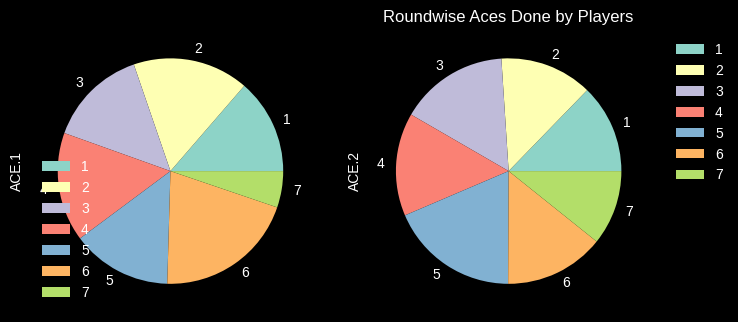

In [ ]:
df=pd.read_csv('Wimbledon-men-2013.csv')
roundwise_aces = df.groupby('Round')[['ACE.1', 'ACE.2']].mean()
roundwise_aces.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title('Roundwise Aces Done by Players')
plt.show()


<ipython-input-68-06a6c4000b91>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


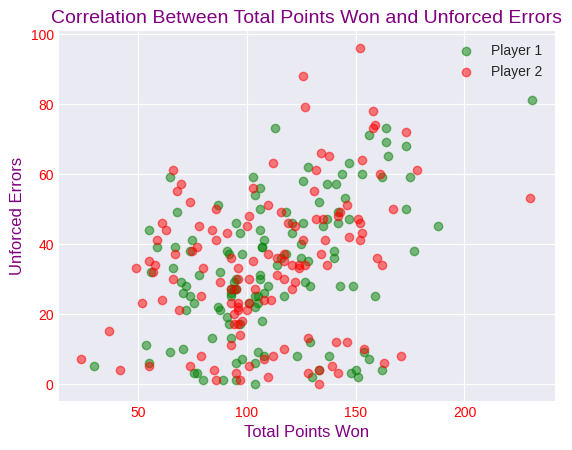

In [ ]:
df=pd.read_csv('AusOpen-men-2013.csv')
import pandas as pd
import matplotlib.pyplot as plt
data = df
plt.style.use('seaborn-darkgrid')
color1 = 'green'
color2 = 'red'
font_color = 'red'
plt.scatter(df['TPW.1'], df['UFE.1'], alpha=0.5, label='Player 1', color=color1)
plt.scatter(df['TPW.2'], df['UFE.2'], alpha=0.5, label='Player 2', color=color2)
plt.xlabel('Total Points Won', fontsize=12, color='purple')
plt.ylabel('Unforced Errors', fontsize=12, color='purple')
plt.title('Correlation Between Total Points Won and Unforced Errors', fontsize=14, color='purple')
plt.tick_params(axis='both', colors=font_color, labelsize=10)
plt.legend(fontsize=10)
plt.show()


<ipython-input-70-b52e6013cc05>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'UFE.1'] = X['UFE.1'].fillna(0)
<ipython-input-70-b52e6013cc05>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'FSP.1'] = X['FSP.1'].fillna(0)
<ipython-input-70-b52e6013cc05>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

Mean Squared Error: 0.2864895657649948
R-squared: -0.24344429585501226


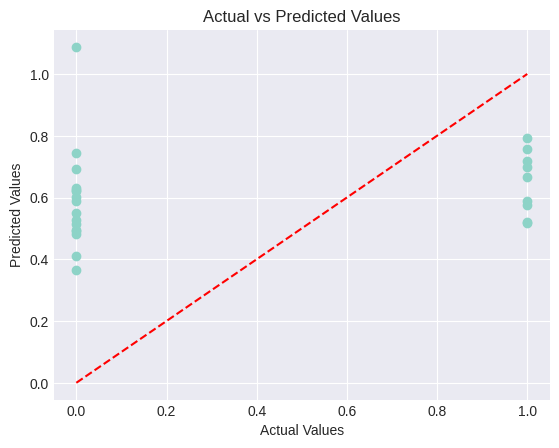

In [ ]:
df=pd.read_csv('Wimbledon-women-2013.csv')
from sklearn.linear_model import LinearRegression
tennis_data = df
X = tennis_data[['UFE.1', 'FSP.1', 'FSP.2', 'SSP.1', 'NPA.1', 'NPA.2']]
y = tennis_data['Result']
X.loc[:, 'UFE.1'] = X['UFE.1'].fillna(0)
X.loc[:, 'FSP.1'] = X['FSP.1'].fillna(0)
X.loc[:, 'FSP.2'] = X['FSP.2'].fillna(0)
X.loc[:, 'SSP.1'] = X['SSP.1'].fillna(0)
X.loc[:, 'NPA.1'] = X['NPA.1'].fillna(0)
X.loc[:, 'NPA.2'] = X['NPA.2'].fillna(0)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()
